In [330]:
import pandas as pd
from sklearn.datasets import load_files
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neural_network import MLPClassifier
'''
MLP (Perceptronul multistrat) este un algoritm supervizat de învățare.
Acesta învață o funcție, prin antrenament pe un set de date.
Cu ajutorul unui set de caracteristici și a rezultatului acestora poate învăța să aproximeze o funcție nonlineară,
fie pentru clasificare, fie pentru regresie.
Perceptronul Multistrat este diferit de regresiile logistice în sensul că între stratul de intrare și cel de ieșire
pot exista unul sau mai multe straturi neliniare, numite straturi ascunse.

https://scikit-learn.org/stable/modules/neural_networks_supervised.html
'''
from sklearn import svm
'''
În general, SVM sunt considerate a fi o abordare de clasificare, dar pot fi utilizate în ambele
tipuri de probleme de clasificare și regresie.
Se poate ocupa cu ușurință mai multe variabile continue și categorice.
SVM construiește un hyperplan în spațiul multidimensional pentru a separa diferite clase.
SVM generează un hyperplan optim într-o manieră iterativă, care este folosită pentru a minimiza o eroare.
Ideea principală a SVM este găsirea unui hiperplan marginal maxim (MMH) care divide cel mai bine setul de date în clase.
Clasificatorul separă punctele de date utilizând un hyperplane cu cea mai mare valoare a marjei. De aceea, un clasificator
SVM este, de asemenea, cunoscut ca un clasificator discriminativ.
SVM oferă o precizie foarte mare în comparație cu alți clasificatori, cum ar fi regresia logistică și arborii de decizie.
'''
from sklearn import tree #Decision tree
'''
Are ca scop divizarea unei colecţii în seturi mai mici prin aplicarea succesivă a unor reguli de decizie.
În arborele de decizie, nodurile rădăcină și interne conțin condiții de testare a atributelor pentru a separa
înregistrările care au caracteristici diferite.
'''
from sklearn.ensemble import RandomForestClassifier
'''
Random Forest Classifier este o metoda de clasificare, regresie si alte sarcini care opereaza prin construirea prin construirea
unei multitudini de arbori de decizie în timpul antrenării și furnizarea clasei necesare clasificării sau a mediei (în cazul
unei regresii) a arborilor individuali. De asemenea, corectează obiceiul de overfitting pe setul de antrenare.
'''

from sklearn.neighbors import KNeighborsClassifier
'''
Este un algoritm de învățare supervizată bazat pe asocieri care nu
necesită o etapă de antrenare propriu-zisă. Se bazează pe învățarea prin analogie și
stabilește clasa corespunzătoare unui exemplu de testare pe baza similarității acestuia
cu k exemple, cele mai similare, din setul de date de antrenament.
Cele k exemple luate în considerare vor stabili clasa exemplului de test pe baza votului majoritar. 
'''

'\nEste un algoritm de învățare supervizată bazat pe asocieri care nu\nnecesită o etapă de antrenare propriu-zisă. Se bazează pe învățarea prin analogie și\nstabilește clasa corespunzătoare unui exemplu de testare pe baza similarității acestuia\ncu k exemple, cele mai similare, din setul de date de antrenament.\nCele k exemple luate în considerare vor stabili clasa exemplului de test pe baza votului majoritar. \n'

<h1> Setul de date IMDB </h1>

- Descriere/Continut:
Contine fraze etichetate ca parere pozitiva sau parere negativa, extrase din recenziile filmelor de pe site-ul imbd.com.

- Format:
propozitie \t scor \n

- Detalii:
Scorul poate fi 1 (pentru recenzie pozitiva) sau 0 (pentru recenzie negativa).
In setul de date exista 500 de fragmente de recenzii pozitive si 500 de fragmente de recenzii negative, care au fost selectate in mod aleator pentru baze si mai mari de recenzii.
S-a incercat selectarea frazelor care au o conotatie pozitiva/negativa clara, sperand ca nicio fraza neutra sa nu fi fost aleasa.

In [115]:
namesCol = ["Review","Sentiment"]
df=pd.read_csv('imdb_labelled.txt', delimiter = '\t', header = None, names=namesCol)

In [117]:
df.head()

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [334]:
print("Dimensiunea tabelului este: ", df.shape)

Dimensiunea tabelului este:  (748, 4)


In [332]:
df.describe()

,Sentiment,review_len,word_count
count,748.000000,748.000000,748.000000
mean,0.516043,110.379679,19.127005
std,0.500077,375.297319,62.521225
min,0.000000,3.000000,1.000000
25%,0.000000,42.750000,8.000000
50%,1.000000,72.000000,12.000000
75%,1.000000,112.000000,20.000000
max,1.000000,7835.000000,1289.000000


- lungimea maxima a unei recenzii este de 1289 de cuvinte
- lungimea minima a unei recenzii este de 1 cuvant
- lungimea medie  a unei recenzii este de 19 cuvinte

In [226]:
df.describe(include=['O'])

,Review
count,748
unique,745
top,not recommended.
freq,2


- convertim textul la scriere cu litera mica pentru a evita ca de exemplu "Plot" si "plot" sa fie luate ca elemente diferite

In [121]:
df['Review']=df['Review'].str.lower()

- eliminam cifrele

In [127]:
import re
df['Review']=df['Review'].str.replace(r'\d+','')

- adaugam coloane noi pentru numarul de cuvinte pe care il contine o recenzie si pentru lungimea recenziei


In [130]:
df['review_len'] = df['Review'].astype(str).apply(len)
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split()))

In [131]:
df.head()

,Review,Sentiment,review_len,word_count
0,"a very, very, very slow-moving, aimless movie ...",0,87,13
1,not sure who was more lost - the flat characte...,0,99,19
2,attempting artiness with black & white and cle...,0,188,31
3,very little music or anything to speak of.,0,44,8
4,the best scene in the movie was when gerardo i...,1,108,21


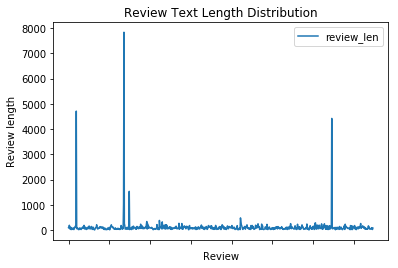

In [196]:
import matplotlib.pyplot as plt
#df['Sentiment'].plot(legend=True)
#df['review_len'].plot(kind=legend=True)
ax=df.plot(0,2,
    legend=True,
    title='Review Text Length Distribution')
ax.set_xlabel("Review")
ax.set_ylabel("Review length")
plt.show()

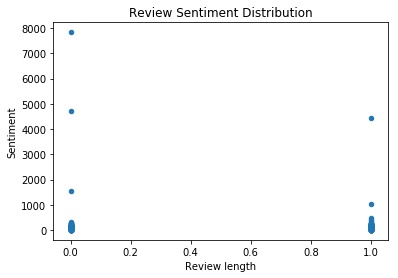

In [215]:
ax=df.plot(1,2,
    kind='scatter',
    legend=True,
    title='Review Sentiment Distribution')
ax.set_xlabel("Review length")
ax.set_ylabel("Sentiment")
plt.show()

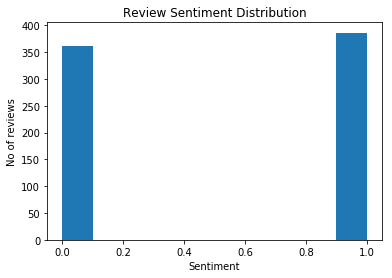

In [336]:
ax=df['Sentiment'].plot(kind='hist',
                       title='Review Sentiment Distribution')
ax.set_xlabel("Sentiment")
ax.set_ylabel("No of reviews")
plt.show()

In [337]:
X=df.iloc[:,0].values
y=np.ravel(df.iloc[:,1])

- transformare in Bag Of Words

In [217]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer().fit(df['Review'])
bag_of_words = vec.transform(df['Review'])
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [219]:
words_freq[:15]

[('the', 849),
 ('and', 434),
 ('of', 377),
 ('is', 340),
 ('it', 325),
 ('this', 292),
 ('to', 253),
 ('in', 203),
 ('was', 186),
 ('movie', 182),
 ('that', 165),
 ('film', 163),
 ('for', 105),
 ('as', 94),
 ('but', 93)]

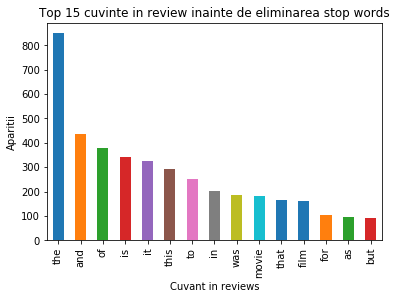

In [222]:
df1 = pd.DataFrame(words_freq[:15], columns = ['ReviewText' , 'count'])
ax=df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 15 cuvinte in review inainte de eliminarea stop words')
ax.set_ylabel("Aparitii")
ax.set_xlabel("Cuvant in reviews")
plt.show()

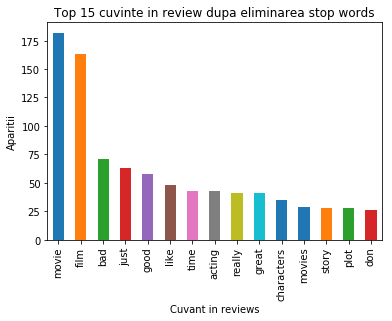

In [223]:
vec = CountVectorizer(stop_words = 'english').fit(df['Review'])
bag_of_words = vec.transform(df['Review'])
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

df1 = pd.DataFrame(words_freq[:15], columns = ['ReviewText' , 'count'])
ax=df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 15 cuvinte in review dupa eliminarea stop words')
ax.set_ylabel("Aparitii")
ax.set_xlabel("Cuvant in reviews")
plt.show()

In [224]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [241]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(df['Review'].loc[:500])

In [275]:
kmeans = KMeans(n_clusters=2).fit(tfidf)
test=df['Review'].loc[500:]
test2=kmeans.predict(tfidf_vectorizer.transform(test))
test2=pd.DataFrame(test2)


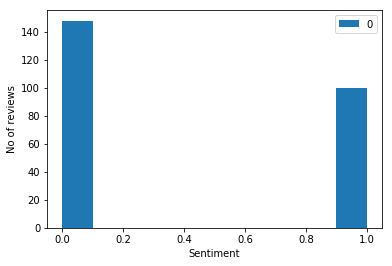

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [273]:
ax=test2.plot(kind='hist')
ax.set_xlabel("Sentiment")
ax.set_ylabel("No of reviews")
plt.show()


In [277]:
def score_report(model, parameters):
    model_GS = GridSearchCV(model, param_grid=parameters,scoring='f1_macro', cv = 5, iid = False, return_train_score=True, n_jobs=-1)
    model_RS = RandomizedSearchCV(estimator = model, param_distributions = parameters,scoring='f1_macro', cv=5, n_iter=5, iid=False, n_jobs=-1)
    scores_GS = cross_validate(model_GS, bag_of_words, y, return_train_score=True, scoring=('f1_macro','accuracy'),cv=5)
    scores_RS = cross_validate(model_RS, bag_of_words, y, return_train_score=True, scoring=('f1_macro','accuracy'),cv=5)
    return scores_GS, scores_RS

In [94]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_data=vectorizer.fit_transform(X)
feature_names=vectorizer.get_feature_names()
print(len(feature_names))

3047


- sunt 3047 de cuvinte diferite
- encoded vector is a sparse matrix
- pentru fiecare cuvant in parte este afisat si de cate ori a fost intalnit in texte


In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(X)
# summarize
print(vectorizer.idf_)

[4.57421655 6.9255918  6.52012669 ... 6.9255918  6.52012669 6.9255918 ]


- TfidfVectorizer “Term Frequency – Inverse Document”
- Term Frequency -insumeaza aparitiile unui cuvant in documentul dat
- Inverse Document Frequency -reduce cuvintele care apar de foarte multe ori in document

In [318]:
results = pd.DataFrame(columns = ['Model',
                                  'Search_strategy',
                                  'train_f1_macro',
                                  'test_f1_macro',
                                  'train_accuracy',
                                  'test_accuracy',
                                  'score_time',
                                  'fit_time'])
def make_line(model:str, search_strategy:str, results):
    results['Model'] = model
    results['Search_strategy'] = search_strategy
    for key, value in results.items():
        if(type(results[key])!=str):
            results[key] = results[key].mean()
    return results

<h1>Decision Tree Classifier</h1>

In [278]:
parameters = {
        'min_samples_split':[2,5,8, 10],
        'splitter':['best', 'random'],
        'max_depth':[1, 10, 20, 30]
    }
res_GS, res_RS = score_report(tree.DecisionTreeClassifier(), parameters=parameters)

In [319]:
res_GSaux = make_line('Decision Tree', 'GridSearchCV', res_GS)
res_RSaux = make_line('Decision Tree', 'RandomSearchCV', res_RS)
results = results.append(res_GSaux, ignore_index=True)
results = results.append(res_RSaux, ignore_index=True)

<h1>Random Forest Classifier</h1>

In [281]:
parameters = {
    'n_estimators'      : [320,330,340],
    'max_depth'         : [8, 9, 10, 11, 12],
    'random_state'      : [0]
    }
res_GS2, res_RS2 = score_report(RandomForestClassifier(n_estimators=100), parameters=parameters)

In [320]:
res_GSaux = make_line('Random Forest', 'GridSearchCV', res_GS2)
res_RSaux = make_line('Random Forest', 'RandomSearchCV', res_RS2)
results = results.append(res_GSaux, ignore_index=True)
results = results.append(res_RSaux, ignore_index=True)

<h1> KNeighbours Classifier</h1>

In [283]:
parameters = {'n_neighbors':[4,5,7],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree']
             }
res_GS3, res_RS3 = score_report(KNeighborsClassifier(n_neighbors=5), parameters=parameters)

In [321]:
res_GSaux = make_line('KNeighborsClassifier', 'GridSearchCV', res_GS3)
res_RSaux = make_line('KNeighborsClassifier', 'RandomSearchCV', res_RS3)
results = results.append(res_GSaux, ignore_index=True)
results = results.append(res_RSaux, ignore_index=True)

<h1>Support Vector Machine</h1>

In [285]:
parameters = {
            'C':[1,5, 10],
            'cache_size':[200, 1000],
            'max_iter':[100, 500, 1000]
    }
res_GS4, res_RS4 = score_report(svm.SVC(gamma='scale'), parameters=parameters)

In [322]:
res_GSaux = make_line('SVM', 'GridSearchCV', res_GS4)
res_RSaux = make_line('SVM', 'RandomSearchCV', res_RS4)
results = results.append(res_GSaux, ignore_index=True)
results = results.append(res_RSaux, ignore_index=True)

In [323]:
results

,Model,Search_strategy,train_f1_macro,test_f1_macro,train_accuracy,test_accuracy,score_time,fit_time
0,Decision Tree,GridSearchCV,0.774297,0.604296,0.784109,0.627018,0.001686,2.413065
1,Decision Tree,RandomSearchCV,0.747867,0.605514,0.766082,0.637738,0.001990,0.381391
2,Random Forest,GridSearchCV,0.854850,0.673388,0.858633,0.695198,0.122416,18.690832
3,Random Forest,RandomSearchCV,0.854498,0.677440,0.858299,0.699225,0.113592,9.332776
4,KNeighborsClassifier,GridSearchCV,0.703286,0.544207,0.719877,0.584350,0.015080,1.183655
5,KNeighborsClassifier,RandomSearchCV,0.688965,0.547422,0.710194,0.593746,0.011415,0.353373
6,SVM,GridSearchCV,0.948807,0.719791,0.948858,0.720621,0.028773,3.543442
7,SVM,RandomSearchCV,0.949144,0.719791,0.949192,0.720621,0.028971,0.990630


In [324]:
def color(grid):
    return ['background-color: red' if value == grid.max() else ('background-color: green' if value == grid.min() else '') for value in grid]

In [328]:
results_highlighted1= results.style.apply(color, subset=[
                                  'train_f1_macro',
                                  'test_f1_macro',
                                  'train_accuracy',
                                  'test_accuracy',
                                  'score_time',
                                  'fit_time'])

In [329]:
results_highlighted1

,Model,Search_strategy,train_f1_macro,test_f1_macro,train_accuracy,test_accuracy,score_time,fit_time
0,Decision Tree,GridSearchCV,0.774297,0.604296,0.784109,0.627018,0.00168614,2.41306
1,Decision Tree,RandomSearchCV,0.747867,0.605514,0.766082,0.637738,0.00199003,0.381391
2,Random Forest,GridSearchCV,0.85485,0.673388,0.858633,0.695198,0.122416,18.6908
3,Random Forest,RandomSearchCV,0.854498,0.67744,0.858299,0.699225,0.113592,9.33278
4,KNeighborsClassifier,GridSearchCV,0.703286,0.544207,0.719877,0.58435,0.0150797,1.18366
5,KNeighborsClassifier,RandomSearchCV,0.688965,0.547422,0.710194,0.593746,0.0114151,0.353373
6,SVM,GridSearchCV,0.948807,0.719791,0.948858,0.720621,0.0287731,3.54344
7,SVM,RandomSearchCV,0.949144,0.719791,0.949192,0.720621,0.028971,0.99063
